In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Load the Excel file into a DataFrame
df = pd.read_excel(r"C:\Users\Agash\Downloads\customer_transactions_sample.xlsx")


In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


# Data Clean up

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


## Checking the Null or Missing values

In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
#Dropping the Rows with null values
df.dropna(subset=['Description'], inplace=True)
df.dropna(subset=['Customer ID'], inplace=True)

In [8]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [10]:
# Converting Customer ID from float to int
df['Customer ID'] = df['Customer ID'].fillna(-1).astype(int)

In [11]:
country_counts = df['Country'].value_counts()
print(country_counts)

Country
United Kingdom          379423
EIRE                      8710
Germany                   8129
France                    5710
Netherlands               2769
Spain                     1278
Switzerland               1187
Belgium                   1054
Portugal                  1024
Channel Islands            906
Sweden                     883
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
Denmark                    428
Norway                     369
Finland                    354
United Arab Emirates       318
Unspecified                280
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA                         65


## Data Preparation

In [12]:
# Converting InvoiceDate to datetime 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extracting date, month, year, and week into separate columns
df['DayOfWeek'] = df['InvoiceDate'].dt.strftime('%A')
df['Month'] = df['InvoiceDate'].dt.strftime('%m').astype(int)
df['Year'] = df['InvoiceDate'].dt.strftime('%Y').astype(int)
df['Week'] = df['InvoiceDate'].dt.strftime('%W').astype(int)

In [13]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,DayOfWeek,Month,Year,Week
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,Tuesday,12,2009,48
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,Tuesday,12,2009,48
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,Tuesday,12,2009,48
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,Tuesday,12,2009,48
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,Tuesday,12,2009,48
...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,Thursday,12,2010,49
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,Thursday,12,2010,49
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,Thursday,12,2010,49
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,Thursday,12,2010,49


In [14]:
# Checking if Invoice starts with 'C'
df['StartsWithC'] = df['Invoice'].str.startswith('C')

df['StartsWithC'].value_counts()

StartsWithC
True    9839
Name: count, dtype: int64

In [15]:
# Using np.where to assign 'Cancelled' or 'Placed' based on StartsWithC column
df['Status'] = np.where(df['StartsWithC'].isnull(), 'Placed', np.where(df['StartsWithC'], 'Cancelled', 'Placed'))

# Total Price
df['totPrice'] = df['Quantity'] * df['Price']


In [16]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,DayOfWeek,Month,Year,Week,StartsWithC,Status,totPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,Tuesday,12,2009,48,NaN,Placed,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,Tuesday,12,2009,48,NaN,Placed,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,Tuesday,12,2009,48,NaN,Placed,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,Tuesday,12,2009,48,NaN,Placed,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,Tuesday,12,2009,48,NaN,Placed,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,Thursday,12,2010,49,NaN,Placed,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,Thursday,12,2010,49,NaN,Placed,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,Thursday,12,2010,49,NaN,Placed,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,Thursday,12,2010,49,NaN,Placed,7.50


# Exploratory Data Analysis - EDA

## Product Quantity Distribution Analysis

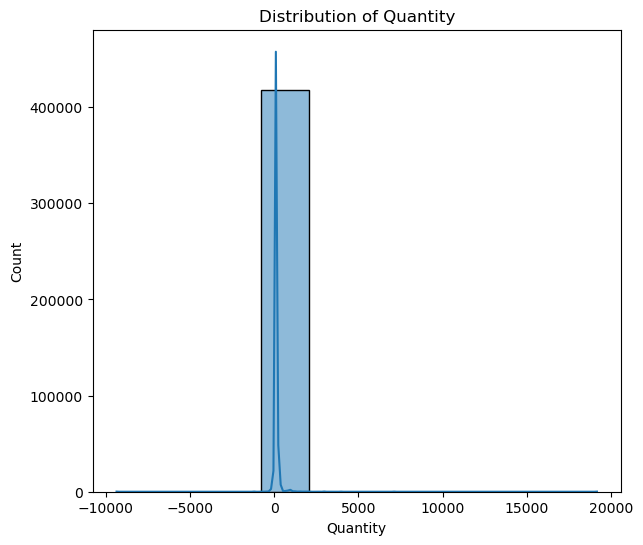

In [17]:
plt.figure(figsize=(15, 6))  
plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=10, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.show()

#### The Distribution is normal which means the data follows a predictable pattern. 
With this insight, 
- we can make more accurate forecasts or predictions about future quantities within a certain range.
- For instance,we can expect that most of your sales or demand will fall within 0 - 400000 , allowing us to plan inventory levels more effectively. 

# PYGWALKER Installation

In [18]:
import pygwalker as pyg

## Sales and Revenue Analysis


### Monthly

In [19]:
monthly_sales = df.groupby(['Year','Month']).agg({'Quantity': 'sum', 'totPrice': 'sum'}).reset_index()

monthly_sales

,Year,Month,Quantity,totPrice
0,2009,12,390286,663272.050
1,2010,1,367141,531952.902
2,2010,2,366317,489399.586
3,2010,3,499030,635996.481
4,2010,4,345590,560635.022
5,2010,5,369726,559924.550
6,2010,6,376237,571459.910
7,2010,7,319573,562785.900
8,2010,8,446926,587256.460
9,2010,9,474112,781033.301


In [20]:
pyg.walk(df, dark='light')

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ccd02f9a4bb6gSxEte3ZPl21JoQ" style="height: auto">\n    <hea…

### Insights
- Both quantity and total price show an increasing trend over the months. For example, from December 2009 (390,286 units, £663,272.05) to November 2010 (638,690 units, £1,134,879.28), there's a significant increase.
-  Seasonal variations are evident, with peaks observed in certain months. November 2010 stands out with the highest values: 638,690 units sold, generating £1,134,879.28 in total revenues.
-  Months with higher quantities and total prices indicate potentially successful promotions or marketing efforts. In October 2010, for instance, 587,157 units were sold, generating £964,989.78 in total revenue.
-  The lowest sales and revenue were recorded in December 2010 with only 146,454 units sold, generating £304,623.35, indicating a notable decrease compared to other months.

### Weekly Sales

In [21]:
weekly_sales = df.groupby(['Year', 'Week']).agg({'Quantity': 'sum', 'totPrice': 'sum'}).reset_index()
weekly_sales.head()

,Year,Week,Quantity,totPrice
0,2009,48,135617,224594.82
1,2009,49,105236,199699.90
2,2009,50,125331,205626.06
3,2009,51,24102,33351.27
4,2010,1,95685,165829.39


In [22]:
pyg.walk(df, dark='light')

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ccd03056fb4woJtqRf5p8NVP13c" style="height: auto">\n    <hea…

### Insights
- Both quantity and total price show an increasing trend over the weeks. For example, from week 1 (135,617 units, £224,594.82) to week 37 (98,355 units, £140,874.02), there's a noticeable increase.

- Seasonal variations are evident, with peaks observed in certain weeks. Week 40 stands out with the highest values: 157,152 units sold, generating £211,277.35 in total revenue.

- Weeks with higher quantities and total prices indicate potentially successful promotions or marketing efforts. In week 39, for instance, 142,436 units were sold, generating £280,133.44 in total revenue.

- The lowest sales and revenue were recorded in week 51 with only 24,102 units sold, generating £33,351.27, indicating a notable decrease compared to other weeks.





### Daywise Sales

In [23]:
daywise_sales = df.groupby('DayOfWeek').agg({'Quantity': 'sum', 'totPrice': 'sum'}).reset_index()
daywise_sales

,DayOfWeek,Quantity,totPrice
0,Friday,738186,1181370.492
1,Monday,1067270,1402937.205
2,Saturday,5119,9803.050
3,Sunday,574558,1012144.521
4,Thursday,1091715,1711504.302
5,Tuesday,885965,1551433.811
6,Wednesday,964426,1479015.193


In [24]:
pyg.walk(df, dark='light')

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ccd03145c1bwPQjsd6KfLZnG8yc" style="height: auto">\n    <hea…

## Insights:-
- Thursday has the highest total revenue: Despite not having the highest quantity sold, Thursday leads in total revenue, indicating higher-priced items might be sold on this day.

- Monday has the highest quantity sold: Monday sees the highest quantity of items sold, closely followed by Tuesday and Wednesday.

- Weekend sales are relatively lower: Saturday and Sunday have considerably lower sales compared to weekdays, which is typical for many businesses.

- Friday has a balanced performance: Friday shows a good balance between quantity sold and total revenue, suggesting a mix of both high-quantity and high-priced items being sold.

##### Overall, weekday sales dominate: Weekdays collectively contribute significantly more to total revenue compared to weekends.

### Countrywise 

In [25]:
pyg.walk(df, dark='light')

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ccd03217eebCcJibF28Uy9nkv4Q" style="height: auto">\n    <hea…

### Insights from Quantity:

- Top Selling Countries: The United Kingdom has the highest quantity sold, followed by EIRE and the Netherlands. These countries significantly contribute to the total quantity sold.

- Regional Variation: Scandinavian countries like Denmark, Norway, and Sweden also show significant quantities sold, indicating strong market presence in Northern Europe.

- Market Penetration: Countries like Australia, France, and Germany also demonstrate substantial quantities sold, suggesting a broad market reach beyond the UK and its neighboring countries.

### Insights from Price (Revenue):

- Revenue Concentration: The United Kingdom generates the highest revenue, followed by EIRE and the Netherlands. These countries not only have high quantities sold but also contribute significantly to the total revenue, indicating potential high-value customers or larger order sizes.

- High Revenue Per Sale: Malta and Channel Islands have relatively smaller quantities sold but higher revenues, suggesting higher price points or premium products.

- Emerging Markets: Some countries like Spain, Sweden, and Switzerland show promising revenue figures, indicating potential growth markets or strong purchasing power within these regions.

## Product Status Analysis

In [42]:
cancellation_counts = df['Status'].value_counts()
cancellation_counts = pd.DataFrame(cancellation_counts).reset_index()
cancellation_counts.columns = ['Status', 'Count']
cancellation_counts

,Status,Count
0,Placed,407695
1,Cancelled,9839


In [43]:
pyg.walk(cancellation_counts, dark='light')

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ccd9902460eMUQAecTx6BV7ftWn" style="height: auto">\n    <hea…

### Products Cancelled Vs Products Placed

### Top 10 Countries with Maximum Product Cancellation

In [27]:
pyg.walk(df, dark='light')

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ccd033c23e14Y3qe6MAWNPfUtbE" style="height: auto">\n    <hea…

### Insights:
- The cancellation number is 9839, indicating a significant but manageable proportion of orders being canceled.

- Cancellations can lead to lost sales opportunities and affect customer satisfaction.

### Top 10 Products by highest Revenue & Sale

In [28]:
pyg.walk(df, dark='light')

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ccd034b7a611g4bE0LcR6Tz9ikA" style="height: auto">\n    <hea…

### Top 10 Products with maximum Cancellations

In [29]:
cancelled_transactions = df[df['Status'] == 'Cancelled']
cancelled_products = cancelled_transactions.groupby('StockCode').size().reset_index(name='Cancellation_Count').sort_values(by='Cancellation_Count', ascending=False)
top_10_cancelled_products = cancelled_products.nlargest(10, 'Cancellation_Count')


In [ ]:
pyg.walk(top_10_cancelled_products, dark='light')

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ccd03587484viB2f10mIuQrMjOH" style="height: auto">\n    <hea…

## Customer Analysis 

### Monthly(MOM) Number of unique customers 

In [34]:
customer_count = df.groupby(['Year', 'Month'])['Customer ID'].nunique().reset_index()

In [35]:
pyg.walk(customer_count, dark='light')

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ccd6787d7a9ECLh7osmuzpZvjrt" style="height: auto">\n    <hea…

### Insights:-


- Customer Engagement:The number of unique customers tends to increase from the end of 2009 to the end of 2010, indicating growing customer engagement over time

- Seasonal Variations:

- There are noticeable fluctuations in customer numbers throughout the year, with peaks around weeks 40-47 in 2010. This suggests possible seasonal trends or events that attract more customers during these peri

- Stability in Later Periods:In the later weeks of 2010 (after week 47), the number of unique customers stabilizes at a relatively high level, indicating consistent customer engagement even towards the end of the year.

### CountryWise

In [36]:
pyg.walk(df, dark='light')

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ccd6f21964esVY6RKhucmda4yge" style="height: auto">\n    <hea…

### Customer Distribution by Country Insight:
1.United Kingdom: The majority of customers are from the United Kingdom, indicating that the company's primary market is in the UK.

2.European Presence: Countries like France, Germany, and the Netherlands also have a significant number of customers, suggesting that the company has a notable presence in Europe.

### Customer Distribution by Unique Customers Overtime Insight:
1.The number of unique customers generally increased over time, peaking in November and December 2010.

2.There is a noticeable increase in the number of unique customers from 2009 to 2010, indicating potential business growth or marketing effectiveness.

3.December 2010 had the highest number of unique customers
